In [1]:
# CLEANING/MANIPULATING/CHECKING LINEARITY OF DATA RELATIONS AFTER COMBINING RENTAL AND SALES INTO ONE TABLE

### After seeing such terrible r2 scores on a few regression models, I've decided to do some further 
### investigating into each column on an individual level to see if I can discover
### the source of my problem.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
from sklearn import preprocessing

In [3]:
style.use('fivethirtyeight')

In [4]:
# read data into a DataFrame
# NaN values filled with 10-day average 

data = pd.read_csv('realestate_data/Combined_RealEstateData_FilledNaN.csv', parse_dates = ['Date'])

In [5]:
# Since we will be predicting the amount of rent to be paid in a month in any given state at a date in the future,
#  OR BottomTier/MiddleTier/TopTier, we need to move it to index 0 to make things easier down the line:

monthly = data.pop('R_Monthly')
data.insert(0, 'R_Monthly', monthly)
data.head()

,R_Monthly,BottomTier,MiddleTier,TopTier,Lstate,Date,B_30DayChange,B_60DayChange,B_90DayChange,M_30DayChange,...,M_PrincipalMonthly,M_AvgMortgage,M_InterestMonthly,T_PrincipalMonthly,T_AvgMortgage,T_InterestMonthly,CityName,R_30DayChange,R_60DayChange,R_90DayChange
0,804,50649,124420,198192,AR,2014-01-01,10,11,36,-36,...,345,1071.394444,726.394444,550,1706.653333,1156.653333,Little Rock,-8.31,-6.9658,9.513714
1,781,50719,124541,198364,AR,2014-02-01,70,80,81,121,...,345,1072.436389,727.436389,551,1708.134444,1157.134444,Little Rock,-23.00,1.1220,9.739740
2,788,50846,124831,198816,AR,2014-03-01,127,197,207,290,...,346,1074.933611,728.933611,552,1712.026667,1160.026667,Little Rock,7.00,-16.0000,9.763400
3,806,50973,125116,199260,AR,2014-04-01,127,254,324,285,...,347,1077.387778,730.387778,553,1715.850000,1162.850000,Little Rock,18.00,25.0000,2.000000
4,799,51080,125354,199628,AR,2014-05-01,107,234,361,238,...,348,1079.437222,731.437222,554,1719.018889,1165.018889,Little Rock,-7.00,11.0000,18.000000


In [6]:
# Convert string and datetype data into numeric values so that they can be used in our algorithms:

le = preprocessing.LabelEncoder()

# convert dates to numerical labels:
data['Date'] = le.fit_transform(np.array(data['Date']))

# convert Lstate to numerical labels:
data['Lstate'] = le.fit_transform(np.array(data['Lstate']))

# convert CityName to numerical labels:
data['CityName'] = le.fit_transform(np.array(data['CityName']))

# round long float values to int:
data['R_Monthly'] = np.rint(np.array(data.R_Monthly)).astype(int)
data['R_30DayChange'] = np.rint(np.array(data.R_30DayChange)).astype(int)
data['R_60DayChange'] = np.rint(np.array(data.R_60DayChange)).astype(int)
data['R_90DayChange'] = np.rint(np.array(data.R_90DayChange)).astype(int)
data['B_InterestMonthly'] = np.rint(np.array(data.B_InterestMonthly)).astype(int)
data['B_AvgMortgage'] = np.rint(np.array(data.B_AvgMortgage)).astype(int)
data['M_InterestMonthly'] = np.rint(np.array(data.M_InterestMonthly)).astype(int)
data['M_AvgMortgage'] = np.rint(np.array(data.M_AvgMortgage)).astype(int)
data['T_InterestMonthly'] = np.rint(np.array(data.T_InterestMonthly)).astype(int)
data['T_AvgMortgage'] = np.rint(np.array(data.T_AvgMortgage)).astype(int)

In [7]:
data.describe()

,R_Monthly,BottomTier,MiddleTier,TopTier,Lstate,Date,B_30DayChange,B_60DayChange,B_90DayChange,M_30DayChange,...,M_PrincipalMonthly,M_AvgMortgage,M_InterestMonthly,T_PrincipalMonthly,T_AvgMortgage,T_InterestMonthly,CityName,R_30DayChange,R_60DayChange,R_90DayChange
count,9330.000000,9330.000000,9330.000000,9.330000e+03,9330.000000,9330.000000,9330.000000,9330.000000,9330.000000,9330.000000,...,9330.000000,9330.000000,9330.000000,9330.000000,9330.000000,9330.000000,9330.000000,9330.000000,9.330000e+03,9.330000e+03
mean,1311.936763,149914.274491,299250.106324,4.485864e+05,19.215541,44.047053,885.574062,1739.116077,2568.823580,1516.031083,...,830.749196,2576.878992,1746.129796,1245.567203,3862.824759,2617.257556,51.987460,1.684673,-6.905058e+05,-9.206739e+05
std,409.407916,81866.920415,152035.970526,2.263487e+05,12.350873,25.660925,955.753655,1807.365782,2589.359282,1753.896632,...,422.331701,1309.210690,886.879145,628.743019,1949.103224,1320.360312,30.303626,342.069297,3.850376e+07,4.445793e+07
min,581.000000,50649.000000,121845.000000,1.878990e+05,0.000000,0.000000,-1149.000000,-1787.000000,-2200.000000,-3428.000000,...,338.000000,1049.000000,711.000000,521.000000,1618.000000,1097.000000,0.000000,-1637.000000,-2.147484e+09,-2.147484e+09
25%,1054.000000,89603.000000,191412.000000,2.929638e+05,7.000000,22.000000,327.000000,656.250000,993.250000,583.000000,...,531.000000,1648.000000,1117.000000,813.250000,2523.000000,1709.000000,26.000000,-57.000000,-1.060000e+02,-4.700000e+01
50%,1200.500000,120697.000000,242357.000000,3.626080e+05,21.000000,44.000000,570.000000,1135.000000,1704.000000,985.000000,...,673.000000,2087.000000,1414.000000,1007.000000,3122.000000,2115.000000,52.000000,4.000000,6.000000e+00,5.000000e+00
75%,1437.750000,184656.750000,363176.000000,5.346540e+05,31.000000,66.000000,1121.000000,2188.750000,3205.750000,1857.000000,...,1008.000000,3127.000000,2119.000000,1484.750000,4603.750000,3119.000000,78.000000,57.000000,1.130000e+02,5.600000e+01
max,3096.000000,422637.000000,812099.000000,1.219370e+06,39.000000,88.000000,9376.000000,16541.000000,22655.000000,19716.000000,...,2255.000000,6993.000000,4738.000000,3387.000000,10500.000000,7113.000000,104.000000,1645.000000,1.645000e+03,1.668000e+03


In [8]:
data['Lstate'].value_counts() # The Top 3 states we have the most data for are state#: 3,7,28

3     890
7     890
28    621
4     445
27    445
35    445
23    445
31    439
34    354
17    267
5     267
36    267
33    266
8     265
29    178
38    178
21    178
39    178
19    178
2     178
16    178
37    177
20     89
18     89
26     89
24     89
15     89
32     89
1      89
30     89
22     89
0      89
6      89
11     89
9      89
25     89
13     89
12     89
10     89
14     88
Name: Lstate, dtype: int64

In [9]:
### Check our data with a few scatter plotts to ensure that it's still linearly related in an effort to reduce noise:

In [10]:
# We'll filter the data by state so it's easier to see the relationship of the data without it being too crowded:

data_filtered = data[data['Lstate']==28]

data_filtered

,R_Monthly,BottomTier,MiddleTier,TopTier,Lstate,Date,B_30DayChange,B_60DayChange,B_90DayChange,M_30DayChange,...,M_PrincipalMonthly,M_AvgMortgage,M_InterestMonthly,T_PrincipalMonthly,T_AvgMortgage,T_InterestMonthly,CityName,R_30DayChange,R_60DayChange,R_90DayChange
336,600,61750,134902,208054,28,2,-27,-55,-27,-54,...,374,1162,788,577,1792,1215,104,-366,-223,-373
337,765,61750,134902,208054,28,2,-27,-55,-27,-54,...,374,1162,788,577,1792,1215,0,11,-172,-218
338,823,61750,134902,208054,28,2,-27,-55,-27,-54,...,374,1162,788,577,1792,1215,25,-150,-103,58
339,829,61750,134902,208054,28,2,-27,-55,-27,-54,...,374,1162,788,577,1792,1215,94,229,-137,6
340,926,61750,134902,208054,28,2,-27,-55,-27,-54,...,374,1162,788,577,1792,1215,19,161,172,-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3182,1074,98627,204949,311271,28,88,1392,2725,3962,2746,...,569,1765,1196,864,2680,1816,94,314,-258,-6
3183,1080,98627,204949,311271,28,88,1392,2725,3962,2746,...,569,1765,1196,864,2680,1816,25,-142,-205,68
3184,1222,98627,204949,311271,28,88,1392,2725,3962,2746,...,569,1765,1196,864,2680,1816,20,-63,210,223
3185,1285,98627,204949,311271,28,88,1392,2725,3962,2746,...,569,1765,1196,864,2680,1816,19,273,286,14


In [11]:
# x-value will be the same for all checks, since we are extrapolating across time into the future for our predictions,
# correspondingly we will want to check across the same data on that axis for each additional y-value:
x = np.array(data_filtered['Date'].values, dtype=np.float64)

# y-value columns to check:

y = np.array(data_filtered['R_30DayChange'].values, dtype=np.float64)
y2 = np.array(data_filtered['R_60DayChange'].values, dtype=np.float64)
y3 = np.array(data_filtered['R_90DayChange'].values, dtype=np.float64)
y4 = np.array(data_filtered['R_Monthly'].values, dtype=np.float64)
y5 = np.array(data_filtered['BottomTier'].values, dtype=np.float64)
y6 = np.array(data_filtered['MiddleTier'].values, dtype=np.float64)
y7 = np.array(data_filtered['TopTier'].values, dtype=np.float64)
y8 = np.array(data_filtered['B_30DayChange'].values, dtype=np.float64)
y9 = np.array(data_filtered['B_60DayChange'].values, dtype=np.float64)
y10 = np.array(data_filtered['B_90DayChange'].values, dtype=np.float64)
y11 = np.array(data_filtered['M_30DayChange'].values, dtype=np.float64)
y12 = np.array(data_filtered['M_60DayChange'].values, dtype=np.float64)
y13 = np.array(data_filtered['M_90DayChange'].values, dtype=np.float64)
y14 = np.array(data_filtered['T_30DayChange'].values, dtype=np.float64)
y15 = np.array(data_filtered['T_60DayChange'].values, dtype=np.float64)
y16 = np.array(data_filtered['T_90DayChange'].values, dtype=np.float64)
y17 = np.array(data_filtered['B_PrincipalMonthly'].values, dtype=np.float64)
y18 = np.array(data_filtered['B_AvgMortgage'].values, dtype=np.float64)
y19 = np.array(data_filtered['B_InterestMonthly'].values, dtype=np.float64)
y20 = np.array(data_filtered['M_PrincipalMonthly'].values, dtype=np.float64)
y21 = np.array(data_filtered['M_AvgMortgage'].values, dtype=np.float64)
y22 = np.array(data_filtered['M_InterestMonthly'].values, dtype=np.float64)
y23 = np.array(data_filtered['T_PrincipalMonthly'].values, dtype=np.float64)
y24 = np.array(data_filtered['T_AvgMortgage'].values, dtype=np.float64)
y25 = np.array(data_filtered['T_InterestMonthly'].values, dtype=np.float64)

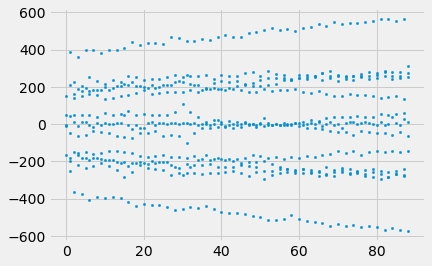

In [12]:
plt.scatter(x, y, s=5) 
plt.show()

# Right off-the-bat, it would appear that we've discovered the source of our r2 scoring problem. 
# This looks to be a mix of positive and negatively correlated data.
# Even if we removed the duplicate data for these dates, this data is nearly a flat line.
# This will be removed, and only operated on if absolutely necessary. 

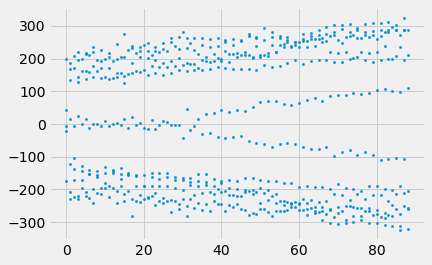

In [13]:
plt.scatter(x, y2, s=5) 
plt.show()

# This too, appears to be a mix of positive and negatively correlated data.
# Even if we removed the duplicate data for these dates, this data is nearly a flat line.
# This will be removed, and only operated on if absolutely necessary. 

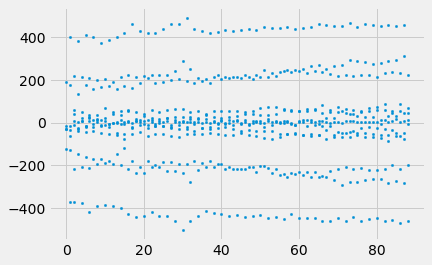

In [14]:
plt.scatter(x, y3, s=5) 
plt.show()

# Even if we removed the duplicate data for these dates, this data is nearly a flat line.
# This will absolutely be removed, as it's linear relationship is close to worthless. 

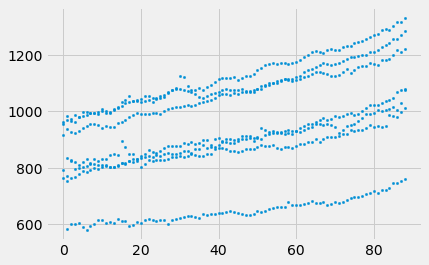

In [15]:
plt.scatter(x, y4, s=5) 
plt.show() 

# This one clearly has duplicates, but is visibly linearly related to the date, close enough to be worth operating on.
# If separated into 3 groups, this appears to be lower/middle/and top tier rental prices.
# Since this would be the last remaining rental data, it's worth trying to separate.                        

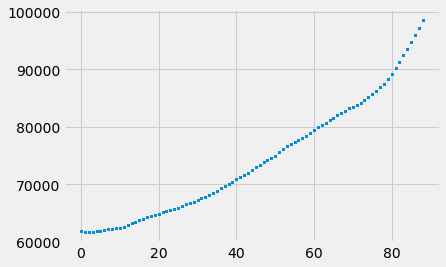

In [16]:
plt.scatter(x, y5, s=5)
plt.show()

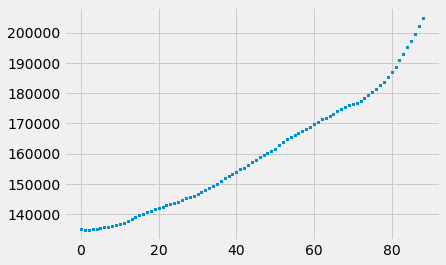

In [17]:
plt.scatter(x, y6, s=5)
plt.show()

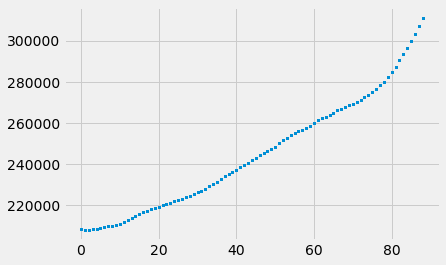

In [18]:
plt.scatter(x, y7, s=5)
plt.show()

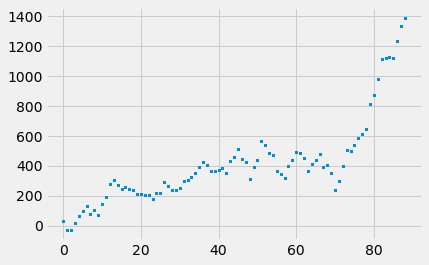

In [19]:
plt.scatter(x, y8, s=5)
plt.show()

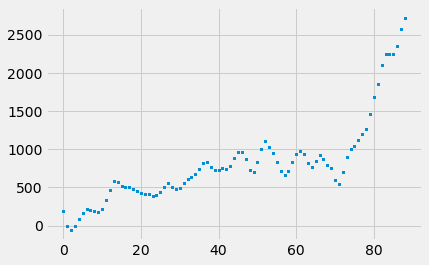

In [20]:
plt.scatter(x, y9, s=5)
plt.show()

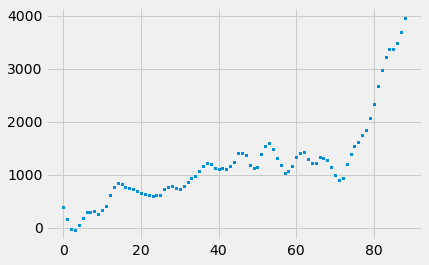

In [21]:
plt.scatter(x, y10, s=5)
plt.show()

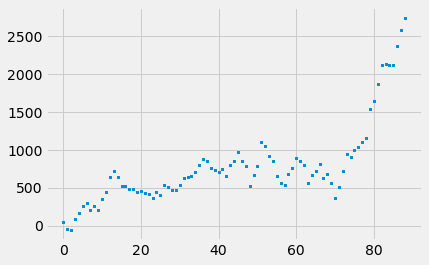

In [22]:
plt.scatter(x, y11, s=5)
plt.show()

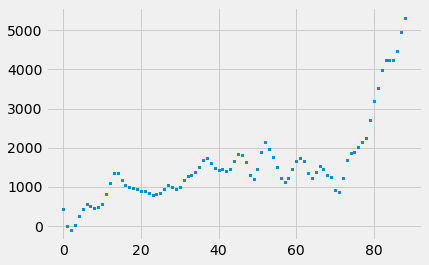

In [23]:
plt.scatter(x, y12, s=5)
plt.show()

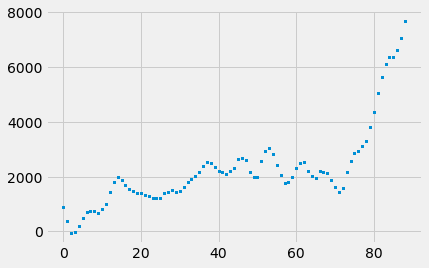

In [24]:
plt.scatter(x, y13, s=5)
plt.show()

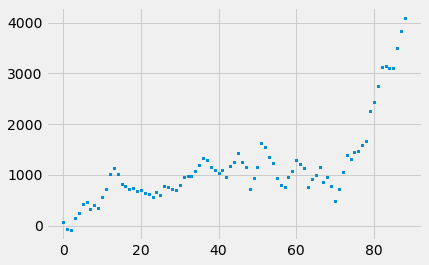

In [25]:
plt.scatter(x, y14, s=5)
plt.show()

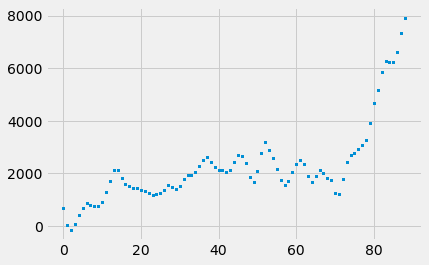

In [26]:
plt.scatter(x, y15, s=5)
plt.show()

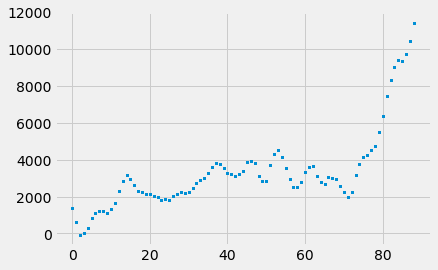

In [27]:
plt.scatter(x, y16, s=5)
plt.show()

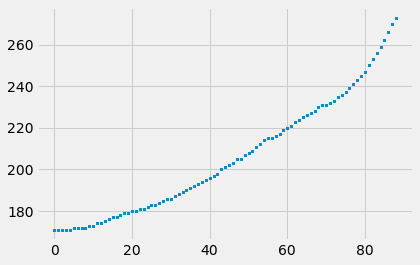

In [28]:
plt.scatter(x, y17, s=5)
plt.show()

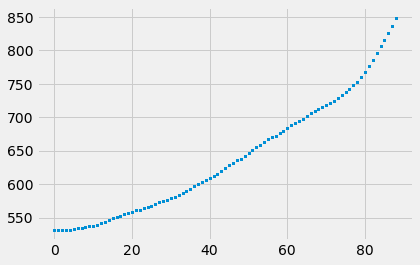

In [29]:
plt.scatter(x, y18, s=5)
plt.show()

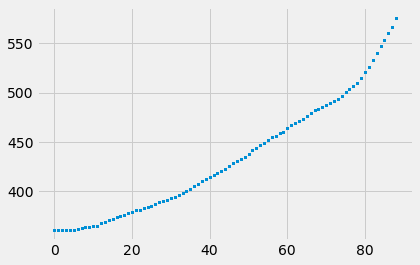

In [30]:
plt.scatter(x, y19, s=5)
plt.show()

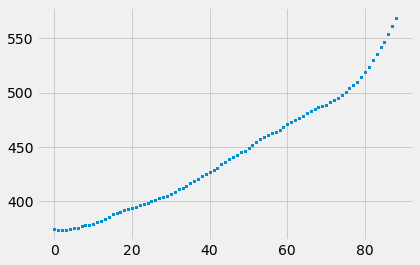

In [31]:
plt.scatter(x, y20, s=5)
plt.show()

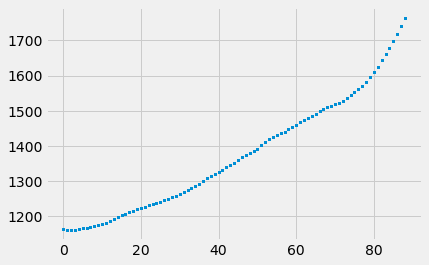

In [32]:
plt.scatter(x, y21, s=5)
plt.show()

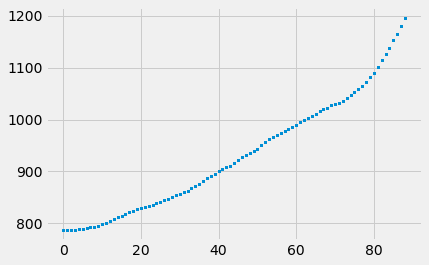

In [33]:
plt.scatter(x, y22, s=5)
plt.show()

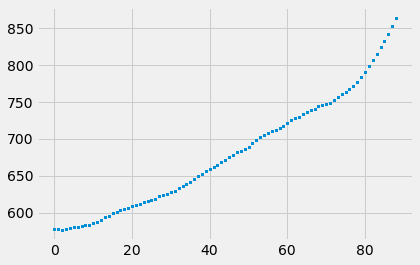

In [34]:
plt.scatter(x, y23, s=5)
plt.show()

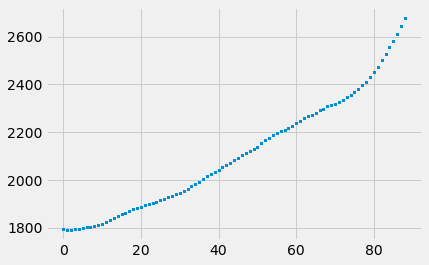

In [35]:
plt.scatter(x, y24, s=5)
plt.show()

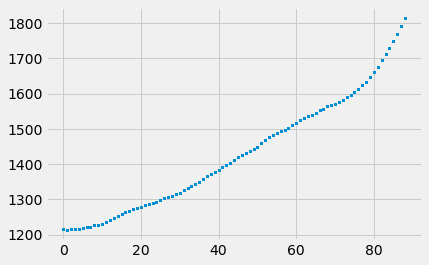

In [36]:
plt.scatter(x, y25, s=5)
plt.show()

In [37]:
# So now we know that we should remove almost all of our rental data: R_30DayChange, R_60DayChange, R_90DayChange.
# R_Monthly is barely worth it to clean up, but I'll try and see since it's the only remaining data for the rental market.